In [2]:
import os
import copy
import numpy as np
import pandas as pd
from PIL import Image

class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("L", (self.n_h*self.r, self.n_v*self.r), color=255)# color=(255,255,255))
        self.cursor = [0,0]
        self.max_h = 0
    
    def move_cursor_h(self, r):
        self.cursor[0] += r
        if self.cursor[0] > self.max_h:
            self.max_h = copy.deepcopy(self.cursor[0])
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path, cut_margin=True, clip_white=False):
        try:
            img = Image.open(path).convert('L').resize((self.r,self.r), Image.BILINEAR)
            if cut_margin:
                img = self.cut_margin(img, clip_white=clip_white)
            self.img.paste(img, tuple(self.cursor))
            return img.size
        except:
            # print(f"Not Appended: {path}")
            return None
        
    def add_letter(self, path, cut_margin=True, clip_white=False):
        imgsize = self.append_img(path, cut_margin=cut_margin, clip_white=clip_white)
        if imgsize is None:
            self.move_cursor_h(self.r)
        else:
            self.move_cursor_h(imgsize[0])
    
    def add_space(self):
        self.move_cursor_h(int(self.r/3))
        
    def enter(self):
        self.move_cursor_v()
        self.reset_cursor_h()
        
    def cut_margin(self, img, clip_white):
        npimg = 255 - np.array(img)
        if clip_white:
            npimg[np.where(npimg<10)] = 0 
        wmin = npimg.sum(0).nonzero()[0].min()
        wmax = npimg.sum(0).nonzero()[0].max()
        # hmin = npimg.sum(1).nonzero()[0].min()
        # hmax = npimg.sum(1).nonzero()[0].max()

        npimg = 255 - npimg[:,wmin:wmax+1]
        img = Image.fromarray(npimg)
        return img

## 종합
- 원본
- CGGAN
- Resized CGGAN
- Assemble Style FD
- FD
- Resize FD
- New Assemble Style FD
- NFD
- Resize NFD

In [5]:
# "/home/jupyter/ai_font/data/reports/exp0604/cggan/i740000"
# "/home/jupyter/ai_font/data/reports/fontdiffuser/resized"
# "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i30000"

fdafd = "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i0"
target_letters = sorted([f.replace(".png", "").split("__")[-1] for f in os.listdir(fdafd) if f.endswith(".png")])
listofexp = [
    "/home/jupyter/ai_font/data/test/processed/플레이브밤비/플레이브밤비__closing__",

    "/home/jupyter/ai_font/data/reports/exp0604/cggan/i740000/cggan__i740000__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/resized/cggan__i740000__플레이브밤비__",
    
    "/home/jupyter/ai_font/data/test_assembled/플레이브밤비/플레이브밤비__closing__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i30000/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/resized/fontdiffuser_phase2__플레이브밤비__",
    
    "/home/jupyter/ai_font/data/test_handcut_assembled/플레이브밤비/플레이브밤비__closing__",
    "/home/jupyter/ai_font/data/reports/exp0604/fontdiffuser_handcut/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/exp0604/fontdiffuser_handcut_resized/fontdiffuser_phase2__플레이브밤비__",
    
]

bimg = ImageConcat(12, len(target_letters), 96)
for k in target_letters:
    for i, subf in enumerate(listofexp):
        bimg.add_letter(f"{subf}{k}.png", cut_margin=False)
        if i in [0,2,5]:
            bimg.add_space()
    bimg.enter()

In [7]:
bimg.img.save("compre2024717.png")

In [16]:
patriot = '''
동해물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세
남산위에 저소나무 철갑을 두른듯
바람서리 불변함은 우리기상 일세
가을하늘 공활한데 높고 구름 없이
밝은달은 우리가슴 일편단심 일세
이기상과 이맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세
무궁화 삼천리 화려강산
대한사람 대한으로 길이 보전하세
'''
letter_sample = '''
안녕 봉구야 나는 일년 미래의 너인 밤비야
처음 접해보는 것들에 어리둥절하고 멤버들과 아직까지는 낯을 가리면서 데뷔 준비하느라고 바쁘겠구나
근데 말이야 지금 이 곳에서는 너가 상상만 했던 일들이 현실이 되고 있어
내가 일년 더 살아본 너로서 너에게 해주고 싶은 말이 있어서 이 편지를 적어본다
일단 멋있고 배울 점 많은 멤버들과 가족같고 따뜻한 직원들을 만난거 축하한다
너는 정말로 운이 좋은 애였더라 그 사람들과 함께라면 앞으로 아무것도 무서울게 없을거야
그리고 가끔은 너 스스로에게 의심도 들고 어느 때는 그 어깨의 짐을 내려놓고 싶을 때가 있었겠지
그런데 정말 믿기 힘들겠지만 지금와서보니 그 모든 것들은 나에게 필요한 거름이 되었어
견디기 힘들어 아플 때도 있겠지만 그냥 아파해도 돼
그것마저도 전부 다 너에게 큰 도움이 될 거니까
그리고 너에게 정말 소중한 하늘의 축복 플리라는 선물이 생기게 돼
그 존재들은 너를 존재할 수 있게 해 주고 그 사람들의 따뜻한 마음들은 너를 더 나은 사람으로 만들어 줄 거야
그 사람들과 함께하면 할 수록 너가 했던 선택들이 전부 틀리지 않았다는 걸 알게 될거야
그리고 너를 보고 있는 수많은 사람들에게도 너가 느꼈던 것들을 바탕으로 위로가 되고 큰 긍정의 힘이 될수있는 너가 되기를 노력해야해
지금 와보니까 나로 인해 힘을 받고 있다는 사람들의 말을 들어보면 그게 그렇게 행복할 수가 없더라
너의 과정들을 가장 잘 알고 있는 나로서 하고 싶은 말은 그동안 너무 고생 많았고 지금까지 와 준 너가 너무 고맙다
앞으로의 나도 그래왔듯 최선을 다하고 더는 의심하지 않을게
'''

In [17]:
len("가을하늘 공활한데 높고 구름 없이")

18

In [11]:

fds = {
    "cggan_gen": "/home/jupyter/ai_font/data/reports/exp0604/cggan/i740000/cggan__i740000__플레이브밤비__",
    "cggan_resized": "/home/jupyter/ai_font/data/reports/fontdiffuser/resized/cggan__i740000__플레이브밤비__",
    "fd_gen": "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i30000/fontdiffuser_phase2__플레이브밤비__",
    "fd_resized": "/home/jupyter/ai_font/data/reports/fontdiffuser/resized/fontdiffuser_phase2__플레이브밤비__",
    "nfd_gen": "/home/jupyter/ai_font/data/reports/exp0604/fontdiffuser_handcut/fontdiffuser_phase2__플레이브밤비__",
    "nfd_resized": "/home/jupyter/ai_font/data/reports/exp0604/fontdiffuser_handcut_resized/fontdiffuser_phase2__플레이브밤비__",
    
}

In [12]:
fontsize = 96
# font = fonts[-1]
# model = models[0]
n_lines = int(10*2)
tag = "애국가"
text = patriot
for n, p in fds.items():
    bigimg = ImageConcat(18, n_lines, fontsize)

    for k in text:
        if k == "\n":
            bigimg.enter()
            bigimg.enter()
        elif k == " ":
            bigimg.add_space()
        else:
            path = f"{p}{k}.png"
            bigimg.add_letter(path, clip_white=True)
    max_h = bigimg.max_h
    bigimg = ImageConcat(int(max_h/fontsize)+2, n_lines, fontsize)
    for k in text:
        if k == "\n":
            bigimg.enter()
            bigimg.enter()
        elif k == " ":
            bigimg.add_space()
        else:
            path = f"{p}{k}.png"
            bigimg.add_letter(path, clip_white=True)

    bigimg.img.save(f"report0717/{n}__{tag}.png")

In [13]:
len("그리고 너를 보고 있는 수많은 사람들에게도 너가 느꼈던 것들을 바탕으로 위로가 되고 큰 긍정의 힘이 될수있는 너가 되기를 노력해야해")

73

In [19]:
fontsize = 96
# font = fonts[-1]
# model = models[0]
n_lines = int(43)
tag = "편지"
text = letter_sample
for n, p in fds.items():
    bigimg = ImageConcat(73, n_lines, fontsize)

    for k in text:
        if k == "\n":
            bigimg.enter()
            bigimg.enter()
        elif k == " ":
            bigimg.add_space()
        else:
            path = f"{p}{k}.png"
            bigimg.add_letter(path, clip_white=True)
    max_h = bigimg.max_h
    bigimg = ImageConcat(int(max_h/fontsize)+2, n_lines, fontsize)
    for k in text:
        if k == "\n":
            bigimg.enter()
            bigimg.enter()
        elif k == " ":
            bigimg.add_space()
        else:
            path = f"{p}{k}.png"
            bigimg.add_letter(path, clip_white=True)

    bigimg.img.save(f"report0717/{n}__{tag}.png")

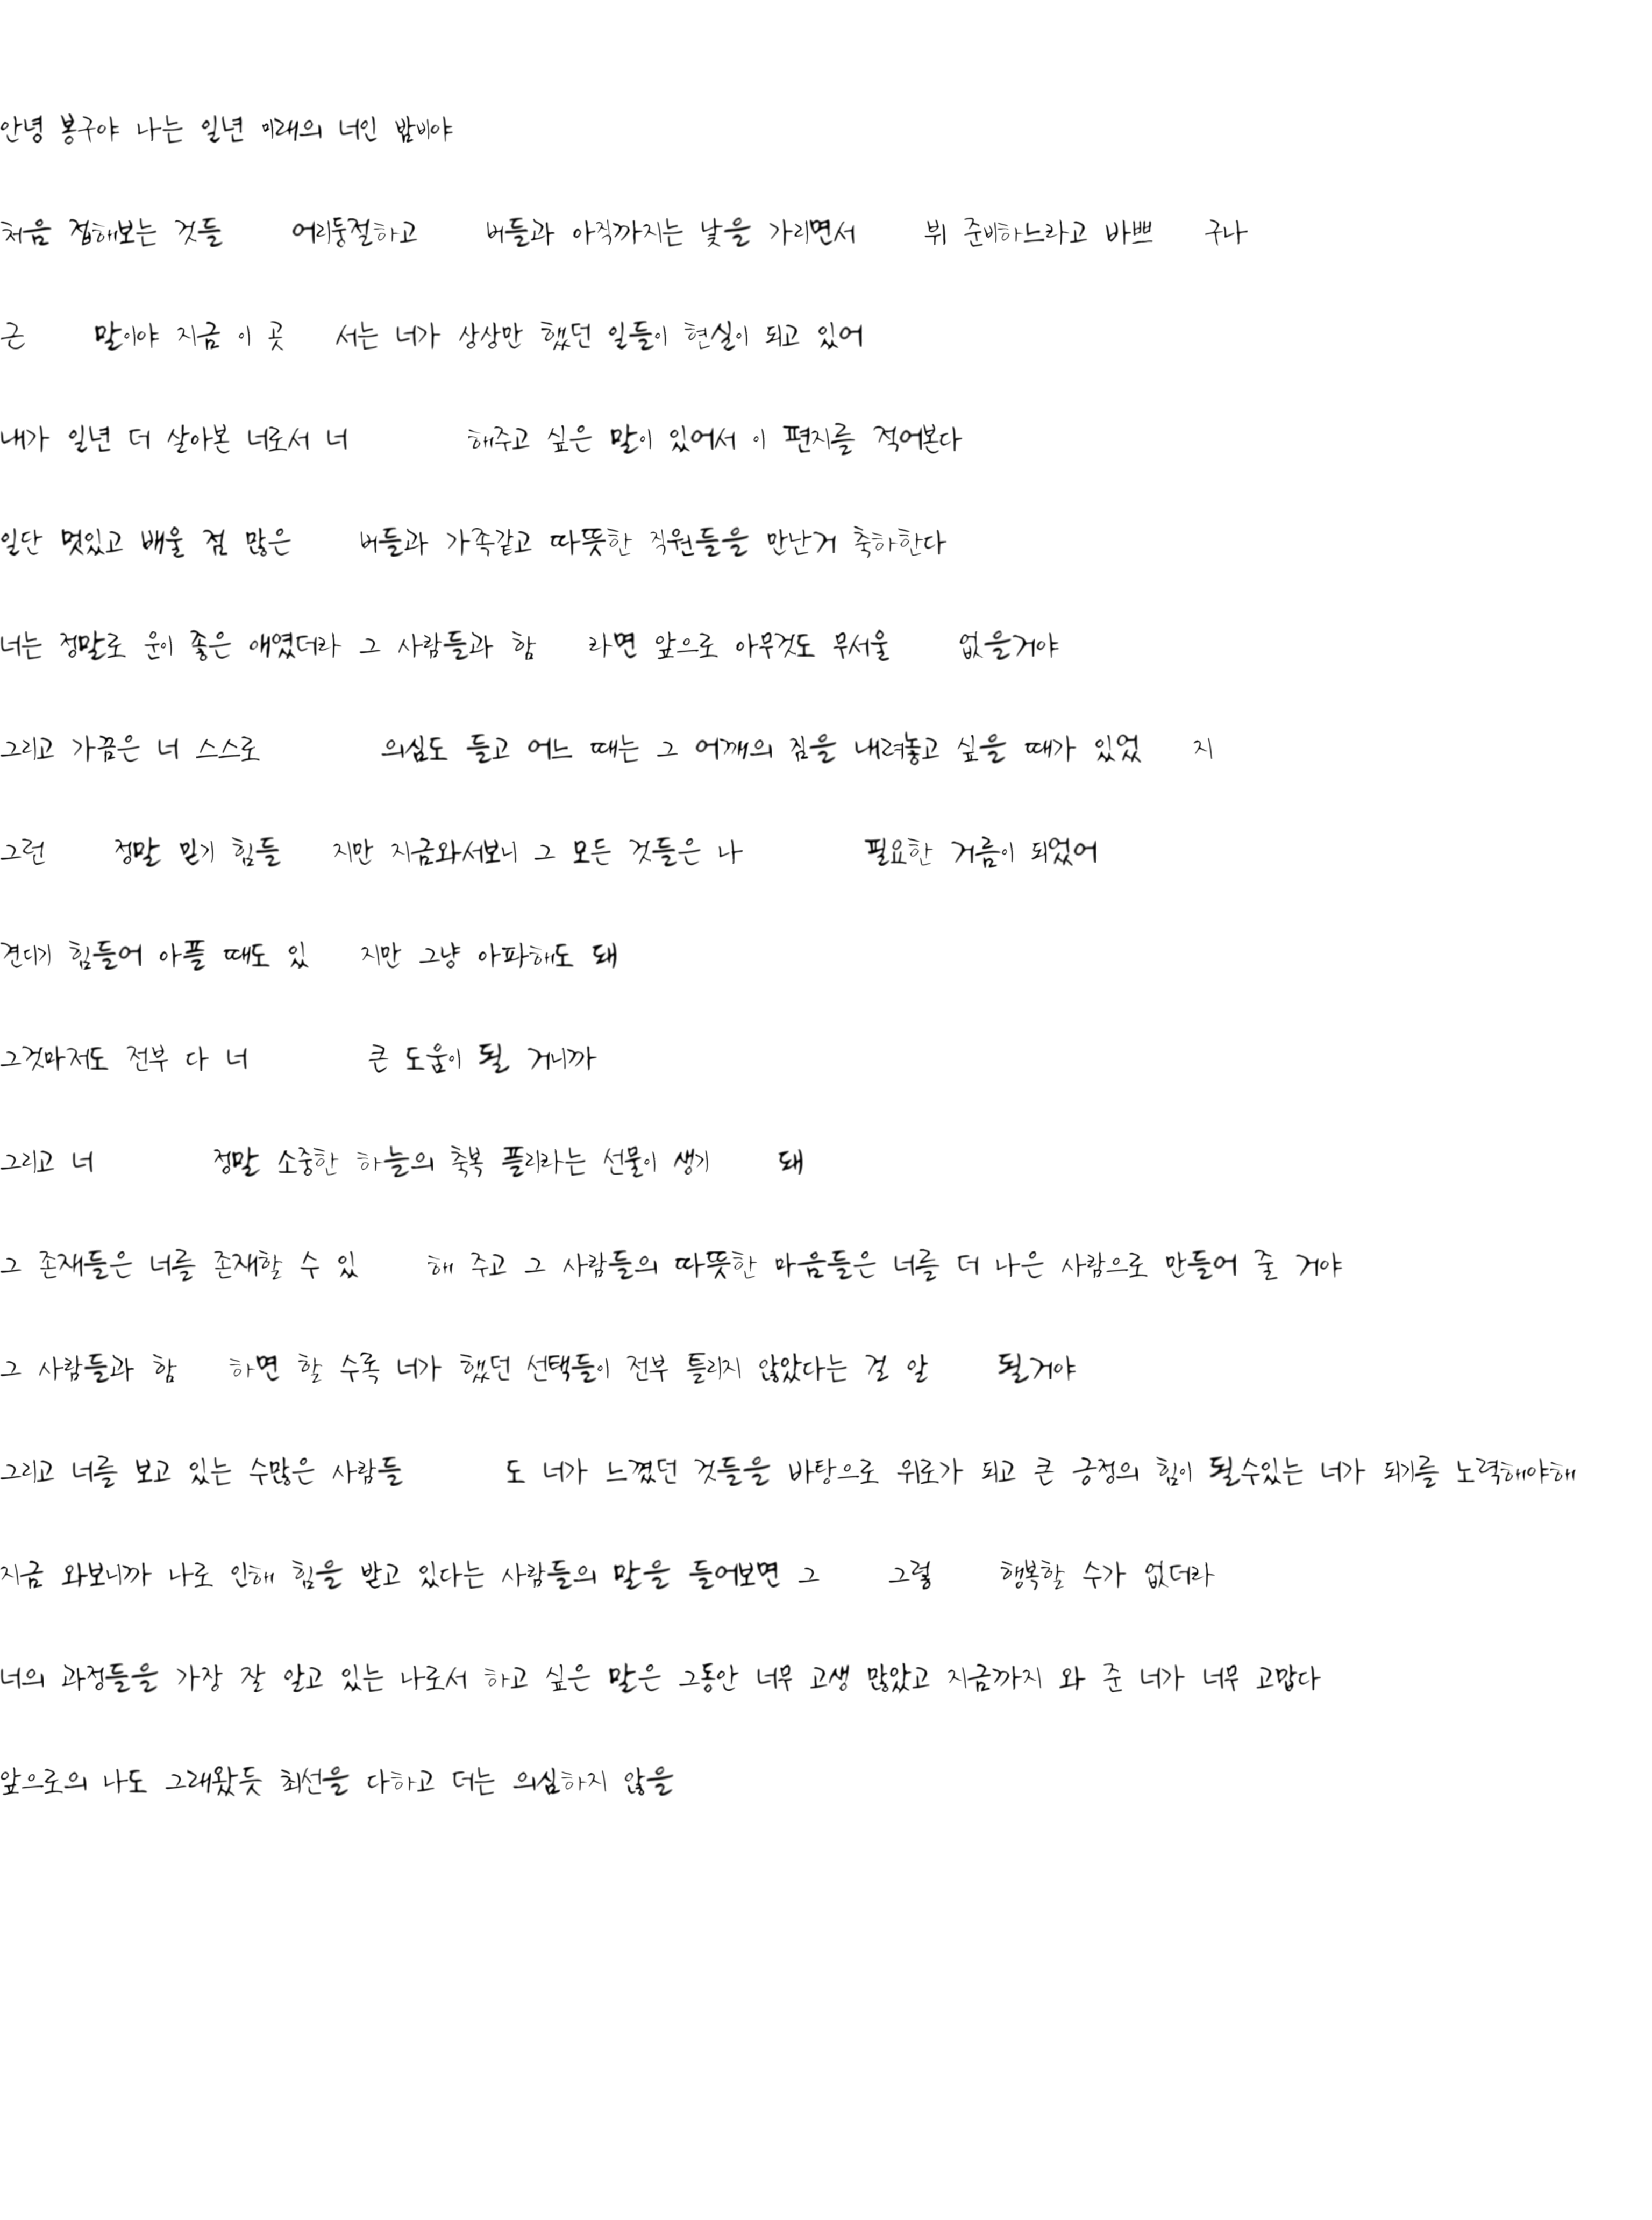

In [20]:
bigimg.img